# AS - TME 2 - BACKPROPAGATION
##### Kalifou René TRAORE - M2 DAC

In [2]:
import numpy as np
from gradient_descent import SGD
import matplotlib.pyplot as plt
from sklearn import preprocessing

def read_libsvm(fname):
    with open(fname) as f:
        x,y  =list(),list()
        for l in f:
            line = l.strip().split(" ")
            y.append(int(line[0]))
            x.append([float(s.split(":")[1]) for s in line[1:]])
    return np.array(x),np.array(y)

def load_mnist(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)
    
##############################################################
##############################################################
if __name__ == "__main__":
        
        train_name = "USPS/USPS_train.txt"
        X_train,Y_train = load_mnist(train_name)
        
        test_name = "USPS/USPS_test.txt"
        X_test,Y_test = load_mnist(test_name)
        
        
        # Binarisation des classes : 1 > [1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
        lb = preprocessing.LabelBinarizer(pos_label=+1,neg_label=-1)
        lb.fit(Y_train)        
        Y_train =  lb.transform(Y_train)
        lb.fit(Y_test)
        Y_test =  lb.transform(Y_test)
        
        nb_iterations = 2000 # modify init range of weigths
        epsilon = 0.1 # Learning rate
        
        # Learning phase : set measurement to False if want to check the speed of Descent
        loss,acc_train,acc_test = SGD(X_train,X_test,Y_train,Y_test,nb_iterations,\
                                      epsilon,measurement_mode=True)        

Y,Y[0] 7291 10
Ns dim 7291 10 2007 256
Done with SGD


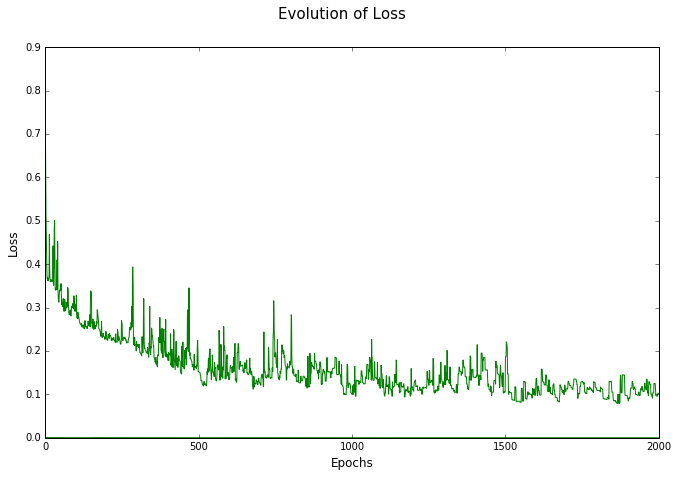

In [5]:
fig = plt.figure(figsize=(11,7))
fig.suptitle('Evolution of Loss',fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(range(len(loss)),loss,'g')
plt.show()

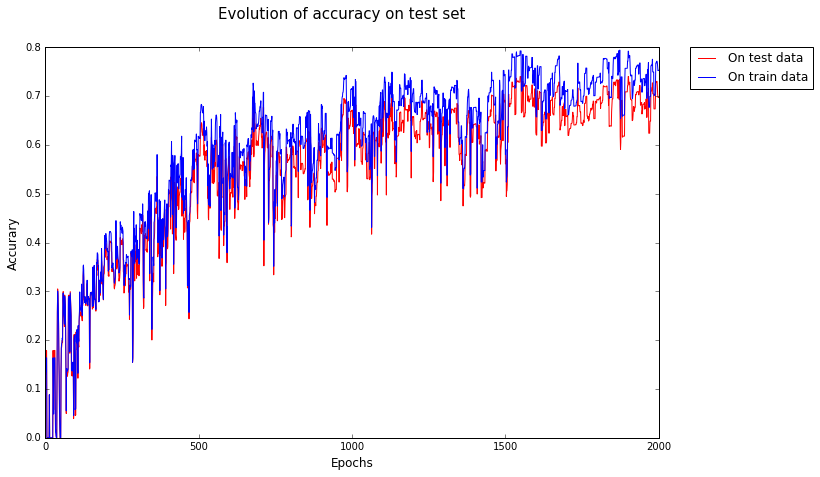

In [4]:
# Plotting the evolution accuracy during the learning steps on train & test set
fig = plt.figure(figsize=(11,7))
fig.suptitle('Evolution of accuracy on test set',fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accurary', fontsize=12)
plt.plot(range(len(acc_test)),acc_test, 'r',label="On test data")
plt.plot(range(len(acc_train)),acc_train, 'b',label="On train data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Interpretation

J'obtient une valeur d'accuracy en test et en train qui converge après N=1500 interations à 75% en test et train. On peut donc dire que le classifieur généralise bien, puisque que j'obtient des valeurs du même ordre en test & train. De même, la mesure d'erreur - ici la MSE Loss tend bien vers 0.

La Retro-propagation implémentée semble donc être effective pour la chaîne de MLP (Module Linéaire -> TanH -> Module Linéaire -> TanH).

PS: En cas de test/mesure de la vitesse de descente, fixez la variable measurement_mode à False dans le main (mesure d'accuracy).